In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### GPU data

In [40]:
path = "../time_analysis.csv"
data = pd.read_csv(path, names=['MatrixSize', 'ExecutionTime'])
data

,MatrixSize,ExecutionTime
0,100,705
1,1000,68
2,10000,371
3,20000,994
4,30000,2343
...,...,...
69,2000,45
70,5000,86
71,10000,267
72,20000,995


In [41]:
execution_gpu_time_df = data.groupby('MatrixSize')['ExecutionTime'].mean().reset_index()
execution_gpu_time_df

,MatrixSize,ExecutionTime
0,50,631.000000
1,100,284.200000
2,200,80.500000
3,300,17.500000
4,400,21.000000
5,500,27.833333
6,700,20.000000
7,1000,70.500000
8,2000,42.000000
9,5000,131.166667


### Serial CPU data

In [42]:
path = "../serial_time_analysis.csv"
serial_data = pd.read_csv(path, names=['MatrixSize', 'ExecutionTime'])


In [43]:
execution_serial_time_df = serial_data.groupby('MatrixSize')['ExecutionTime'].mean().reset_index()
execution_serial_time_df

,MatrixSize,ExecutionTime
0,50,0.000000
1,100,0.000000
2,200,3.000000
3,300,9.000000
4,400,18.000000
5,500,30.000000
6,700,62.500000
7,1000,139.285714
8,2000,728.000000
9,5000,4708.000000


### OMP Data

In [44]:
path = "../omp_time_analysis.csv"
omp_data = pd.read_csv(path, names=['MatrixSize', 'ExecutionTime'])

In [45]:
execution_omp_time_df = serial_data.groupby('MatrixSize')['ExecutionTime'].mean().reset_index()
execution_omp_time_df

,MatrixSize,ExecutionTime
0,50,0.000000
1,100,0.000000
2,200,3.000000
3,300,9.000000
4,400,18.000000
5,500,30.000000
6,700,62.500000
7,1000,139.285714
8,2000,728.000000
9,5000,4708.000000


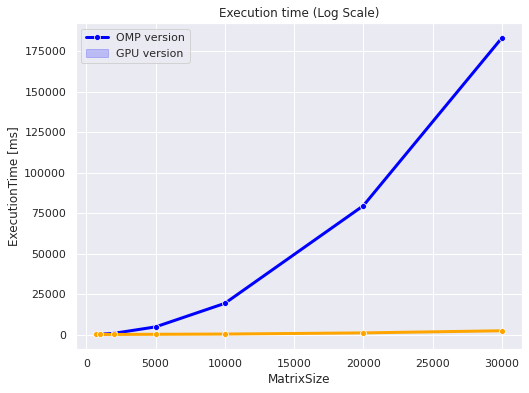

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

x_label = execution_gpu_time_df.columns[0]
y_label = execution_gpu_time_df.columns[1]

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x=x_label, y=y_label, data=execution_omp_time_df.iloc[6::, ], marker='o', linewidth=3, ax=ax, color='blue')
sns.lineplot(x=x_label, y=y_label, data=execution_gpu_time_df.iloc[6::, ], marker='o', linewidth=3, ax=ax, color='orange')

ax.set_title('Execution time (Log Scale)')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label + ' [ms]')

ax.legend(['OMP version', 'GPU version'])

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()


In [76]:
df = pd.merge(execution_gpu_time_df, execution_omp_time_df, on="MatrixSize", how="inner")
df.set_index('MatrixSize', inplace=True)
df.columns = ['CUDA version', 'OMP version']
df

,CUDA version,OMP version
MatrixSize,,
50,631.000000,0.000000
100,284.200000,0.000000
200,80.500000,3.000000
300,17.500000,9.000000
400,21.000000,18.000000
500,27.833333,30.000000
700,20.000000,62.500000
1000,70.500000,139.285714
2000,42.000000,728.000000


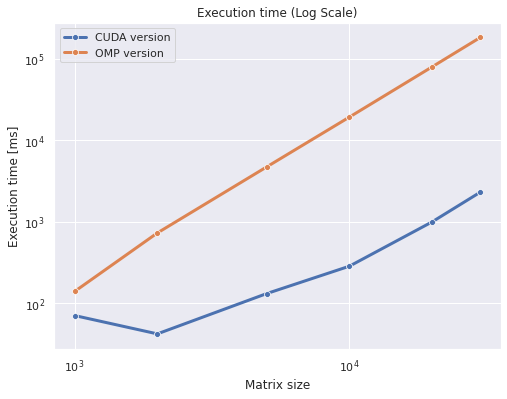

In [92]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(data=df[7::], marker='o', linewidth=3, ax=ax, dashes=False)
ax.set_title('Execution time (Log Scale)')
ax.set_xlabel("Matrix size")
ax.set_ylabel("Execution time [ms]")
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig("../plots/log_log_matrix_1.png")
plt.show()

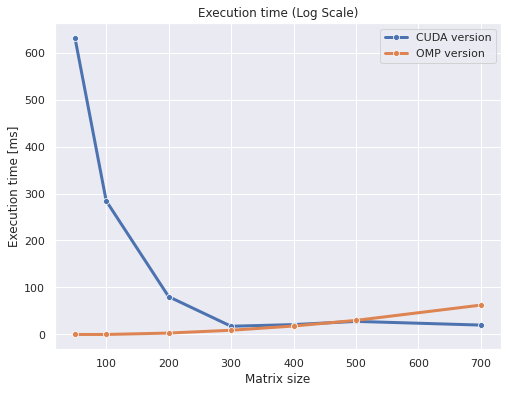

In [98]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(data=df[0:7], marker='o', linewidth=3, ax=ax, dashes=False)
ax.set_title('Execution time (Log Scale)')
ax.set_xlabel("Matrix size")
ax.set_ylabel("Execution time [ms]")

plt.savefig("../plots/log_log_matrix_2.png")
plt.show()

In [94]:
df[0:7]

,CUDA version,OMP version
MatrixSize,,
50,631.000000,0.0
100,284.200000,0.0
200,80.500000,3.0
300,17.500000,9.0
400,21.000000,18.0
500,27.833333,30.0
700,20.000000,62.5
